In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/customer_shopping_data.csv')
df.head()


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [ ]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   gender          99457 non-null  object  
 1   age             99457 non-null  int64   
 2   quantity        99457 non-null  int64   
 3   price           99457 non-null  float64 
 4   payment_method  99457 non-null  object  
 5   shopping_mall   99457 non-null  object  
 6   AgeGroup        99457 non-null  category
dtypes: category(1), float64(1), int64(2), object(3)
memory usage: 4.6+ MB


In [ ]:
df.drop('invoice_no',axis=1,inplace=True)
df.drop('customer_id',axis=1,inplace=True)
df.drop('invoice_date',axis=1,inplace=True)

In [ ]:
age_bins=[0,18,25,35,45,float('inf')]
age_labels=['<18','18-25','26-35','36-45','46+']
df['AgeGroup']=pd.cut(df['age'],bins=age_bins,labels=age_labels,right=False)
print(df[['age','AgeGroup']])

       age AgeGroup
0       28    26-35
1       21    18-25
2       20    18-25
3       66      46+
4       53      46+
...    ...      ...
99452   45      46+
99453   27    26-35
99454   63      46+
99455   56      46+
99456   36    36-45

[99457 rows x 2 columns]


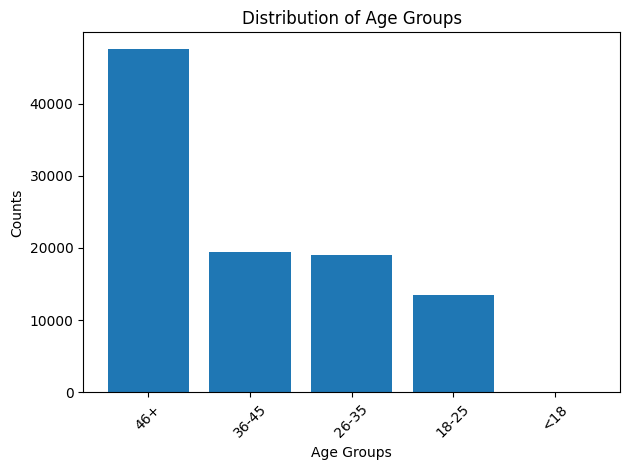

In [ ]:
import matplotlib.pyplot as plt
age_group_counts = df['AgeGroup'].value_counts()
# Create a bar plot using Matplotlib
plt.bar(age_group_counts.index, age_group_counts.values)
plt.xlabel("Age Groups")
plt.ylabel("Counts")
plt.title("Distribution of Age Groups")
plt.xticks(rotation=45)
# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
df_encoded = pd.get_dummies(df, columns=["gender", "payment_method","shopping_mall","category"])
print(df_encoded)

       age  quantity    price AgeGroup  gender_Female  gender_Male  \
0       28         5  1500.40    26-35              1            0   
1       21         3  1800.51    18-25              0            1   
2       20         1   300.08    18-25              0            1   
3       66         5  3000.85      46+              1            0   
4       53         4    60.60      46+              1            0   
...    ...       ...      ...      ...            ...          ...   
99452   45         5    58.65      46+              1            0   
99453   27         2    10.46    26-35              0            1   
99454   63         2    10.46      46+              0            1   
99455   56         4  4200.00      46+              0            1   
99456   36         3    35.19    36-45              1            0   

       payment_method_Cash  payment_method_Credit Card  \
0                        0                           1   
1                        0                 

In [ ]:
df_encoded

,age,quantity,price,AgeGroup,gender_Female,gender_Male,payment_method_Cash,payment_method_Credit Card,payment_method_Debit Card,shopping_mall_Cevahir AVM,...,shopping_mall_Viaport Outlet,shopping_mall_Zorlu Center,category_Books,category_Clothing,category_Cosmetics,category_Food & Beverage,category_Shoes,category_Souvenir,category_Technology,category_Toys
0,28,5,1500.40,26-35,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,21,3,1800.51,18-25,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,20,1,300.08,18-25,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,66,5,3000.85,46+,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,53,4,60.60,46+,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,45,5,58.65,46+,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
99453,27,2,10.46,26-35,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
99454,63,2,10.46,46+,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
99455,56,4,4200.00,46+,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
age = df['age']
category_columns = df[['quantity']]


covariance_matrix = np.cov(age, category_columns, rowvar=False)

print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
[[2.24701713e+02 1.41204414e-02]
 [1.41204414e-02 1.99664003e+00]]


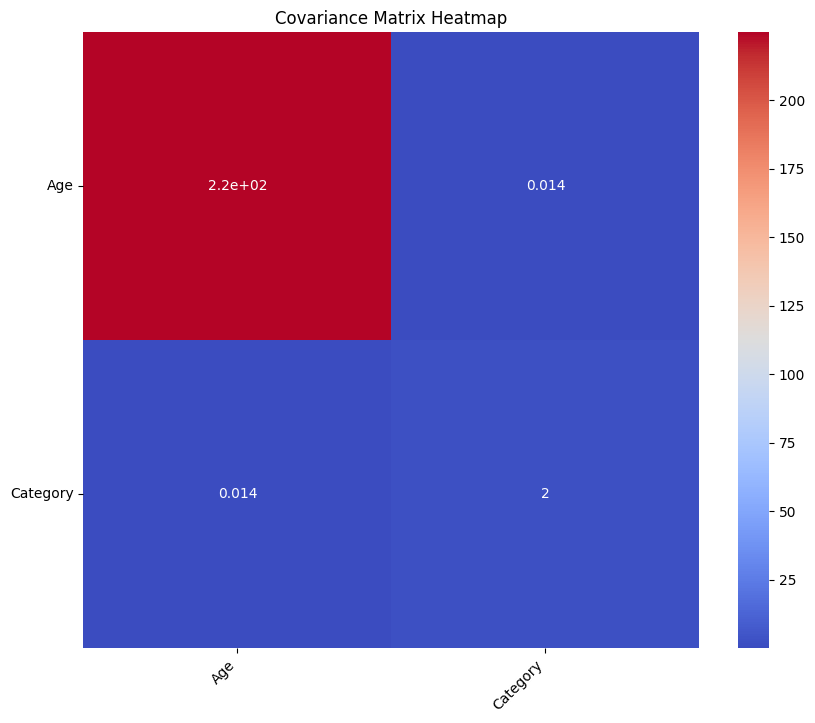

In [ ]:
import seaborn as sns
feature_names = ['Age', 'Category']  # Replace with actual feature names

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(covariance_matrix, annot=True, cmap="coolwarm", square=True)

heatmap.set_xticklabels(feature_names, rotation=45, ha='right')
heatmap.set_yticklabels(feature_names, rotation=0)

plt.title("Covariance Matrix Heatmap")
plt.show()

In [ ]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['gender'], df['category'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Expected-value:",expected)

Chi-Square Statistic: 7.567873097409636
P-value: 0.37223416407226817
Expected-value: [[ 2978.97425018 20625.55409876  9029.02514655  8837.04547694
   6001.00936083  2989.7394653   2987.94526278  6032.70693868]
 [ 2002.02574982 13861.44590124  6067.97485345  5938.95452306
   4032.99063917  2009.2605347   2008.05473722  4054.29306132]]


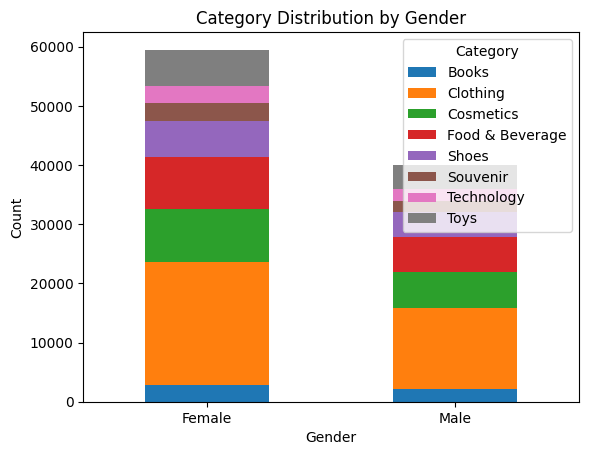

Chi-Square Statistic: 7.567873097409636
p-value: 0.37223416407226817


In [ ]:
contingency_table.plot(kind="bar", stacked=True)
plt.title("Category Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Category")
plt.show()
print("Chi-Square Statistic:",chi2_stat)
print("p-value:", p_val)

In [ ]:
from scipy.stats import ttest_ind
male_data = df[df["gender"] == "Male"]["price"]
female_data = df[df["gender"] == "Female"]["price"]
t_statistic, p_value = ttest_ind(male_data, female_data)
print("T-Statistic:", t_statistic)
print("p-value:", p_value)
if p_value < 0.05:
    print("Reject null hypothesis: The means are significantly different.")
else:
    print("Fail to reject null hypothesis: The means are not significantly different.")

T-Statistic: 0.45725199179880294
p-value: 0.6474909309116355
Fail to reject null hypothesis: The means are not significantly different.


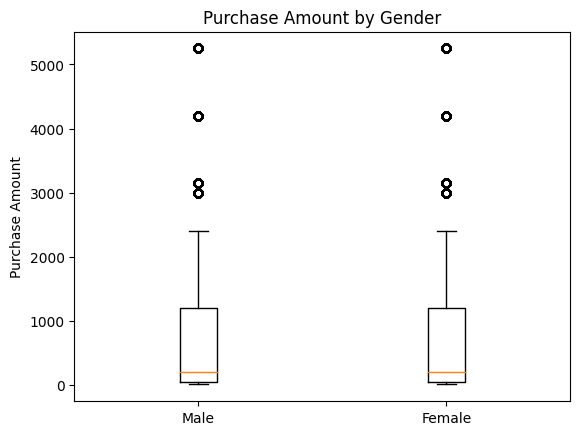

T-Statistic: 0.45725199179880294
p-value: 0.6474909309116355
Fail to reject null hypothesis: The means are not significantly different.


In [ ]:
plt.boxplot([male_data, female_data], labels=["Male", "Female"])
plt.title("Purchase Amount by Gender")
plt.ylabel("Purchase Amount")
plt.show()

print("T-Statistic:", t_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject null hypothesis: The means are significantly different.")
else:
    print("Fail to reject null hypothesis: The means are not significantly different.")